<font color='#FF5733' size="10"> Projet:Fouille de Données </font>
<br>


<font color ='FF5733' size='9'> Thème</font>
<font color='#5C4545' size='9'>Classification des Tweets </font>

### API key from tweets developper account


In [40]:
%load_ext watermark
%watermark --iversions

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
re     2.2.1
pandas 1.1.3
numpy  1.19.2
nltk   3.5
tweepy 3.9.0



In [37]:
import tweepy

# authorization tokens
consumer_key = "Tippg04Ns8bfIZtE3uMprKEym" 
consumer_secret = "qHjBkD4CBX67rHPenKu96c7W5Tsv59t9BGBVsm0pXM0oLatOS8"
access_key= "1328070400136400905-ZOCtds4L0DD3LqMJ2r9rZHSyAi75Xu"
access_secret = "qX3pBBD42A1dAZDPXx2DGcH0T0hcr4e5Oxw40YwR9wTnc"

### Collecting tweets 

In [32]:
# function to display data of each tweet 
def printtweetdata(n, ith_tweet): 
    print() 
    print(f"Tweet {n}:") 
    print(f"Username:{ith_tweet[0]}") 
    print(f"Description:{ith_tweet[1]}") 
    print(f"Location:{ith_tweet[2]}") 
    print(f"Following Count:{ith_tweet[3]}") 
    print(f"Follower Count:{ith_tweet[4]}") 
    print(f"Total Tweets:{ith_tweet[5]}") 
    print(f"Retweet Count:{ith_tweet[6]}") 
    print(f"Tweet Text:{ith_tweet[7]}") 
    print(f"Hashtags Used:{ith_tweet[8]}") 
  
  
# function to perform data extraction 
def scrape(words, date_since, numtweet): 
      
    # Creating DataFrame using pandas 
    db = pd.DataFrame(columns=['username', 'description', 'location', 'following', 
                               'followers', 'totaltweets', 'retweetcount', 'text', 'hashtags']) 
      
    # We are using .Cursor() to search through twitter for the required tweets. 
    # The number of tweets can be restricted using .items(number of tweets) 
    tweets = tweepy.Cursor(api.search, q=words, lang="en", 
                           since=date_since, tweet_mode='extended').items(numtweet) 
     
    # .Cursor() returns an iterable object. Each item in  
    # the iterator has various attributes that you can access to  
    # get information about each tweet 
    list_tweets = [tweet for tweet in tweets] 
      
    # Counter to maintain Tweet Count 
    i = 1  
      
    # we will iterate over each tweet in the list for extracting information about each tweet 
    for tweet in list_tweets: 
        username = tweet.user.screen_name 
        description = tweet.user.description 
        location = tweet.user.location 
        following = tweet.user.friends_count 
        followers = tweet.user.followers_count 
        totaltweets = tweet.user.statuses_count 
        retweetcount = tweet.retweet_count 
        hashtags = tweet.entities['hashtags'] 
          
        # Retweets can be distinguished by a retweeted_status attribute, 
        # in case it is an invalid reference, except block will be executed 
        try: 
            text = tweet.retweeted_status.full_text 
        except AttributeError: 
            text = tweet.full_text 
        hashtext = list() 
        for j in range(0, len(hashtags)): 
            hashtext.append(hashtags[j]['text']) 
          
        # Here we are appending all the extracted information in the DataFrame 
        ith_tweet = [username, description, location, following, 
                     followers, totaltweets, retweetcount, text, hashtext] 
        db.loc[len(db)] = ith_tweet 
          
        # Function call to print tweet data on screen 
        printtweetdata(i, ith_tweet) 
        i = i+1
    filename = 'scraped_tweets5.csv'
      
    # we will save our database as a CSV file. 
    db.to_csv(filename) 
  
  
 

auth = tweepy.OAuthHandler(consumer_key, consumer_secret) 
auth.set_access_token(access_key, access_secret) 
api = tweepy.API(auth,wait_on_rate_limit=True) 
      
    # Enter Hashtag and initial date 
print("Enter Twitter HashTag to search for") 
words = input() 
print("Enter Date since The Tweets are required in yyyy-mm--dd") 
date_since = input() 
      
    # number of tweets you want to extract in one run 
numtweet = 3000 
scrape(words, date_since, numtweet) 
print('Scraping has completed!')

Enter Twitter HashTag to search for
HL
Enter Date since The Tweets are required in yyyy-mm--dd
2020-12-01


TweepError: Failed to send request: ('Connection aborted.', RemoteDisconnected('Remote end closed connection without response'))

In [93]:
#import pandas as pd
#df=pd.read_csv('scraped_tweets5.csv')
#print(df.shape)
#df.head(20)

FileNotFoundError: [Errno 2] No such file or directory: 'scraped_tweets5.csv'

In [94]:
##import pandas as pd
##df_1=pd.read_csv('final.csv')
##print(df_1.shape)
##df_1.head(20)

(10985, 10)


,Unnamed: 0,username,description,location,following,followers,totaltweets,retweetcount,text,hashtags
0,0,RDukum,Attorney AMA - I get dumb people to admit they...,"Arizona, USA",475,68,2415,0,@carolki13 @KeithGrant09 @JoeBiden Biden can’t...,[]
1,1,MalSantoDiego,Was born and isn't dead yet.,"Austin, TX",692,76,4786,77,If you or someone you know may be considering ...,[]
2,2,DwayneKroohs,Social media vanguard and editor.,NaN,241,82,1242,77,If you or someone you know may be considering ...,[]
3,3,smits_scott,Have you all heard about Twitter?,"Milwaukee, WI",399,44,470,4,Bonus Item: Text Upgrade.\n\nMy amazing Patron...,[]
4,4,SarahSassenach,Mother and lover of all great characters.,NaN,218,338,33341,77,If you or someone you know may be considering ...,[]
5,5,mike_sd_3,The philanthropist successful businessman and ...,NaN,499,2668,1751,0,@TBSLFLWR (575) 519-5796 text me ASAp y’all,[]
6,6,RFMtoday,Richmond’s trusted family magazine is FREE at ...,"Richmond, Virginia",1961,11418,47869,0,Talking about suicide does not promote the ide...,['SuicidePrevention']
7,7,garden_lass,"Vegetarian, cat lover, got world's best kids a...","Wigan, England",677,233,1073,0,Brilliant night with Father Christmas and @nlw...,['Lowton']
8,8,marysalpha,"French lessons,adults all nationalities,total ...","semur-en-auxois, Bourgogne",2644,2901,13132,0,@suzibewell @ALL4language @rifjudy @linguascop...,[]
9,9,JohnSnowLabs,John Snow Labs is an award-winning AI & NLP co...,United States,25177,34140,8581,1,Watch Seth Grimes dive into the representation...,"['ml', 'ai', 'nlp', 'nlpsummit2020']"


In [95]:
#Jusq'au la on a reussi a collecter deux datasets,Je vais les concatiner et l'enregister dans un seul fichier CSV
df_final=pd.concat([df, df_1], ignore_index=True)
print(df_final.shape)
df_final.head()

(19096, 11)


,text,text_tokenized,Unnamed: 0,username,description,location,following,followers,totaltweets,retweetcount,hashtags
0,Biden can t even keep up with a teleprompte...,biden can t even keep up with a teleprompt wit...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,If you or someone you know may be considering ...,if you or someon you know may be consid suicid...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Bonus Item Text Upgrade My amazing Patrons ...,bonus item text upgrad my amaz patron support ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,text me ASAp y all,text me asap y all,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Talking about suicide does not promote the ide...,talk about suicid doe not promot the idea of s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
import pandas as pd
#df_final.to_csv('final.csv',index=False)
df=pd.read_csv('final.csv')
df.head()

,Unnamed: 0,username,description,location,following,followers,totaltweets,retweetcount,text,hashtags
0,0,RDukum,Attorney AMA - I get dumb people to admit they...,"Arizona, USA",475,68,2415,0,@carolki13 @KeithGrant09 @JoeBiden Biden can’t...,[]
1,1,MalSantoDiego,Was born and isn't dead yet.,"Austin, TX",692,76,4786,77,If you or someone you know may be considering ...,[]
2,2,DwayneKroohs,Social media vanguard and editor.,NaN,241,82,1242,77,If you or someone you know may be considering ...,[]
3,3,smits_scott,Have you all heard about Twitter?,"Milwaukee, WI",399,44,470,4,Bonus Item: Text Upgrade.\n\nMy amazing Patron...,[]
4,4,SarahSassenach,Mother and lover of all great characters.,NaN,218,338,33341,77,If you or someone you know may be considering ...,[]


In [2]:
# affichage d'informations sur les données 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10985 entries, 0 to 10984
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    10985 non-null  int64 
 1   username      10985 non-null  object
 2   description   9875 non-null   object
 3   location      7732 non-null   object
 4   following     10985 non-null  int64 
 5   followers     10985 non-null  int64 
 6   totaltweets   10985 non-null  int64 
 7   retweetcount  10985 non-null  int64 
 8   text          10985 non-null  object
 9   hashtags      10985 non-null  object
dtypes: int64(5), object(5)
memory usage: 858.3+ KB


In [22]:
to_drop = ['Unnamed: 0',
           'username',
           'description',
           'location',
           'following',
           'followers',
           'totaltweets',
           'retweetcount',
           'hashtags']
#Eliminer les colonnes dans la liste de to_drop du dataframe df
df.drop(to_drop, inplace=True, axis=1)
#Afficherle résultat
df.head()

,text
0,@carolki13 @KeithGrant09 @JoeBiden Biden can’t...
1,If you or someone you know may be considering ...
2,If you or someone you know may be considering ...
3,Bonus Item: Text Upgrade.\n\nMy amazing Patron...
4,If you or someone you know may be considering ...


In [23]:
import numpy as np
import re
#We will use this function to remove the pattern ‘@user’ from all the tweets in our data.
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
    return input_txt 
# remove twitter handles (@user)
df['text'] = np.vectorize(remove_pattern)(df['text'], "@[\w]*")
#remove hashtags
df['text'] = np.vectorize(remove_pattern)(df['text'], "#[\w]*")
#remove URL
df['text'] = np.vectorize(remove_pattern)(df['text'], "http[\w]*")

In [24]:
#Supprimer les lignes dupliquées
df = df.drop_duplicates(ignore_index =True)
print(df.shape)

(8111, 1)


In [25]:
df.head(20)

,text
0,Biden can’t even keep up with a teleprompte...
1,If you or someone you know may be considering ...
2,Bonus Item: Text Upgrade.\n\nMy amazing Patron...
3,(575) 519-5796 text me ASAp y’all
4,Talking about suicide does not promote the ide...
5,Brilliant night with Father Christmas and in ...
6,What is the meaning of this text ??
7,Watch Seth Grimes dive into the representation...
8,President Trump really wants YOU on his team a...
9,"choose your font and size of choice, type a w..."


In [26]:
# remove special characters, numbers, punctuations
df['text'] = df['text'].str.replace("[^a-zA-Z#]", " ")
df.head(20)

,text
0,Biden can t even keep up with a teleprompte...
1,If you or someone you know may be considering ...
2,Bonus Item Text Upgrade My amazing Patrons ...
3,text me ASAp y all
4,Talking about suicide does not promote the ide...
5,Brilliant night with Father Christmas and in ...
6,What is the meaning of this text
7,Watch Seth Grimes dive into the representation...
8,President Trump really wants YOU on his team a...
9,choose your font and size of choice type a w...


In [27]:
print(df.shape)
df.drop_duplicates()
print("apres",df.shape)

(8111, 1)
apres (8111, 1)


### text analysis with nltk

In [29]:
tokenized_tweet = df['text'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [Biden, can, t, even, keep, up, with, a, telep...
1    [If, you, or, someone, you, know, may, be, con...
2    [Bonus, Item, Text, Upgrade, My, amazing, Patr...
3                             [text, me, ASAp, y, all]
4    [Talking, about, suicide, does, not, promote, ...
Name: text, dtype: object

In [30]:
from nltk.stem.porter import *
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import LancasterStemmer
stemmer = PorterStemmer()
stemm= LancasterStemmer()
sn_stemmer=SnowballStemmer("english")
tokenized_tweet= tokenized_tweet.apply(lambda x: [sn_stemmer.stem(i) for i in x]) # stemming
tokenized_tweet.head(20)

0     [biden, can, t, even, keep, up, with, a, telep...
1     [if, you, or, someon, you, know, may, be, cons...
2     [bonus, item, text, upgrad, my, amaz, patron, ...
3                              [text, me, asap, y, all]
4     [talk, about, suicid, doe, not, promot, the, i...
5     [brilliant, night, with, father, christma, and...
6                 [what, is, the, mean, of, this, text]
7     [watch, seth, grime, dive, into, the, represen...
8     [presid, trump, realli, want, you, on, his, te...
9     [choos, your, font, and, size, of, choic, type...
10    [don, t, text, her, pleas, yes, she, s, in, la...
11                    [imma, just, text, him, im, bore]
12    [if, an, object, is, made, by, at, least, one,...
13    [i, ve, been, address, by, differ, name, via, ...
14    [the, day, you, ll, need, k, sharpli, you, ll,...
15                    [doe, he, sign, everi, text, dad]
16    [cctv, video, amp, audio, from, poll, locat, t...
17    [am, i, the, onli, one, who, notic, when, 

In [41]:
import nltk
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
tokenized_tweet = tokenized_tweet.apply(lambda x: [wordnet_lemmatizer.lemmatize(i) for i in x]) # lemmatize
tokenized_tweet.head(20)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ouala\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


0     [biden, can, t, even, keep, up, with, a, telep...
1     [if, you, or, someon, you, know, may, be, cons...
2     [bonus, item, text, upgrad, my, amaz, patron, ...
3                              [text, me, asap, y, all]
4     [talk, about, suicid, doe, not, promot, the, i...
5     [brilliant, night, with, father, christma, and...
6                 [what, is, the, mean, of, this, text]
7     [watch, seth, grime, dive, into, the, represen...
8     [presid, trump, realli, want, you, on, his, te...
9     [choos, your, font, and, size, of, choic, type...
10    [don, t, text, her, plea, yes, she, s, in, lag...
11                    [imma, just, text, him, im, bore]
12    [if, an, object, is, made, by, at, least, one,...
13    [i, ve, been, address, by, differ, name, via, ...
14    [the, day, you, ll, need, k, sharpli, you, ll,...
15                    [doe, he, sign, everi, text, dad]
16    [cctv, video, amp, audio, from, poll, locat, t...
17    [am, i, the, onli, one, who, notic, when, 

In [42]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
stop_words=set(stopwords.words("english"))
print(stop_words)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ouala\AppData\Roaming\nltk_data...


{'will', 'few', 'needn', 'hers', 'whom', 'only', 'ain', 'just', 'being', 'down', 'ourselves', 'hadn', 'where', 's', 'which', 'a', 'didn', 'for', 'the', "it's", 'weren', 'over', 'and', 'because', 't', 'theirs', "weren't", "won't", 'once', 'why', "hadn't", 'yourself', 'them', 'had', 'how', 'between', 'yours', 'ma', 'she', 'nor', "mustn't", 'his', 'or', 'own', 'were', 'been', 'my', "needn't", 'themselves', "wouldn't", 'i', 'shouldn', 'off', 'before', 'each', 'having', 'these', 've', 'most', "she's", 'there', 'but', 'no', 'any', 'such', 'up', 'an', 'mustn', 'when', 'aren', 'haven', 'so', 'myself', 'all', 'm', 'to', 'hasn', 'other', 'from', 'not', 'this', 'below', 'it', 'through', 'both', 'in', 'some', "isn't", 'here', 'more', "couldn't", 'who', "you've", 'y', 'then', 'ours', 'on', 'we', 'her', 'couldn', 'than', "should've", 'mightn', 'at', 're', 'our', 'can', 'about', 'd', 'o', 'was', 'now', 'is', "that'll", 'has', 'too', 'after', 'did', 'are', 'doing', 'further', 'against', 'be', "aren't"

[nltk_data]   Package stopwords is already up-to-date!


In [13]:
tokenized_tweet.apply(lambda x: [item for item in x if item not in stop_words])

0                   [biden, even, keep, teleprompt, text]
1       [someon, know, may, consid, suicid, contact, n...
2       [bonus, item, text, upgrad, amaz, patron, supp...
3                                            [text, asap]
4       [talk, suicid, doe, promot, idea, suicid, some...
                              ...                        
8106    [whi, hear, benni, hill, music, watch, co, egg...
8107    [got, moonlight, starlight, need, night, come,...
8108    [im, talent, hungri, hard, work, west, coast, ...
8109    [hello, san, diego, hope, everyon, continu, st...
8110    [jibeom, wanna, talk, music, especi, hyukoh, c...
Name: text, Length: 8111, dtype: object

In [14]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i]=set(tokenized_tweet[i])
print(len(tokenized_tweet))

8111


In [15]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

df["text_tokenized"] = tokenized_tweet
df.head()

,text,text_tokenized
0,Biden can t even keep up with a teleprompte...,can teleprompt text a even keep over biden up ...
1,If you or someone you know may be considering ...,may home line deaf en by at contact espa the h...
2,Bonus Item Text Upgrade My amazing Patrons ...,font don i read they style webcom love ll bonu...
3,text me ASAp y all,y asap all text me
4,Talking about suicide does not promote the ide...,promot atxl home l call about the hotlin is co...


In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
# tfidf vectorizer of scikit learn
vectorizer = TfidfVectorizer(stop_words=stop_words,max_features=3000, max_df = 0.5, use_idf = True, ngram_range=(1,3))
X = vectorizer.fit_transform(df['text_tokenized'])
print(X.shape) # check shape of the document-term matrix
terms = vectorizer.get_feature_names()
print(terms)

(8111, 3000)
['ab', 'abl', 'abl zero', 'abl zero wonder', 'abov', 'absolut', 'abt', 'abus', 'accept', 'access', 'accord', 'account', 'accur', 'achiev', 'across', 'act', 'action', 'activ', 'actor', 'actual', 'actual get', 'actual wa', 'ad', 'add', 'addict', 'addit', 'address', 'administr', 'admit', 'adult', 'advanc', 'adventur', 'advic', 'af', 'af funni', 'afc', 'affect', 'afford', 'afraid', 'african', 'afternoon', 'age', 'agenc', 'agenda', 'agent', 'ago', 'agre', 'ah', 'ahead', 'air', 'al', 'album', 'album new', 'alert', 'alex', 'allah', 'allen', 'allow', 'almighti', 'almost', 'almost think', 'alon', 'along', 'alot', 'alreadi', 'alright', 'also', 'also co', 'also hope', 'also hope tri', 'also music', 'also peopl', 'also tri', 'alt', 'altern', 'although', 'alway', 'alway sport', 'amapiano', 'amaz', 'amazon', 'ameen', 'america', 'america sport', 'america sport card', 'american', 'amin', 'among', 'amount', 'amp', 'amp even', 'amp find', 'amp life', 'amp light', 'amp text', 'amp think', 'a

### clustering

In [169]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import logging
n_cluster = [3,5,8,10,14,16,20,23,26,30]
ineratias = []
scores = []
for i in n_cluster:
    model=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0,verbose=True)
    model.fit(X)
    labes=model.labels_
    scores.append(silhouette_score(X,labes))
    ineratias.append(model.inertia_)

Initialization complete
Iteration 0, inertia 15296.514650674815
Iteration 1, inertia 7788.63756054351
Iteration 2, inertia 7741.312101443049
Iteration 3, inertia 7721.852674376399
Iteration 4, inertia 7718.930302244821
Iteration 5, inertia 7717.298553175125
Iteration 6, inertia 7716.4356576948985
Iteration 7, inertia 7715.835737733078
Iteration 8, inertia 7715.466921074646
Iteration 9, inertia 7715.2625612096945
Iteration 10, inertia 7715.161478427793
Iteration 11, inertia 7715.101930517939
Iteration 12, inertia 7715.076430363964
Iteration 13, inertia 7715.052830844685
Iteration 14, inertia 7715.02773827318
Iteration 15, inertia 7715.015987815411
Iteration 16, inertia 7715.014783187118
Converged at iteration 16: strict convergence.
Initialization complete
Iteration 0, inertia 15329.713329122724
Iteration 1, inertia 7805.533165124768
Iteration 2, inertia 7788.578384739082
Iteration 3, inertia 7778.172267888751
Iteration 4, inertia 7754.009767847152
Iteration 5, inertia 7752.037890171981

Iteration 16, inertia 7772.666073874321
Iteration 17, inertia 7772.587132100073
Iteration 18, inertia 7772.510158019865
Iteration 19, inertia 7772.442569146907
Iteration 20, inertia 7772.404314310421
Iteration 21, inertia 7772.354351106237
Iteration 22, inertia 7772.3124964485505
Iteration 23, inertia 7772.284299766047
Iteration 24, inertia 7772.263862071427
Iteration 25, inertia 7772.241980666144
Iteration 26, inertia 7772.215570107646
Iteration 27, inertia 7772.208766709613
Iteration 28, inertia 7772.19920381264
Iteration 29, inertia 7772.189568547347
Iteration 30, inertia 7772.178328512778
Iteration 31, inertia 7772.17381011752
Iteration 32, inertia 7772.172912076725
Iteration 33, inertia 7772.172007987793
Converged at iteration 33: strict convergence.
Initialization complete
Iteration 0, inertia 15062.543938188863
Iteration 1, inertia 7746.0275484283775
Iteration 2, inertia 7720.33258860507
Iteration 3, inertia 7711.422229419971
Iteration 4, inertia 7709.69159522856
Iteration 5, in

KeyboardInterrupt: 

In [140]:
print(scores)

[0.017028194530771576, 0.027982100930316105, 0.03210287814913819, 0.034212418758428065, 0.03378793170192352, 0.03312453090758404, 0.03810850377423949, 0.03694047145860573, 0.03930772957708502, 0.043601304927099405]


Text(0, 0.5, 'silhouette_score')

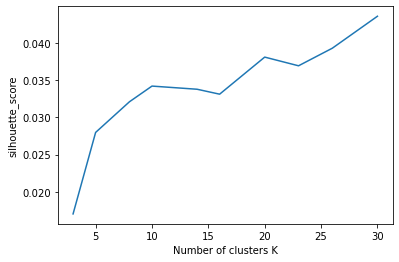

In [141]:
import matplotlib.pyplot as plt
plt.plot(n_cluster, scores)
plt.xlabel('Number of clusters K')
plt.ylabel('silhouette_score')

In [39]:
from sklearn.cluster import KMeans
true_k=20
model = KMeans(n_clusters=true_k,init='k-means++',max_iter=300,n_init=10,random_state=0)
model.fit(X)
print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]

for i in range(true_k):
    print("Cluster %d:" % i, end='')
    for ind in order_centroids[i,:7]:
        print(' %s' % terms[ind], end='')
    print()

Top terms per cluster:
Cluster 0: co song new listen holiday remix amp
Cluster 1: co music music co appl new award amazon
Cluster 2: becaus funni sport becaus wa may like wa
Cluster 3: america sport card america card co check card co co check sport card
Cluster 4: cool co like may zoom friday co frustrat
Cluster 5: music listen co appl play award like
Cluster 6: good may sport good co funni sport music
Cluster 7: back text back text co back co may get
Cluster 8: video music co co music music video offici new
Cluster 9: gt amazon buy buy amazon co buy gt co co buy amazon
Cluster 10: wa funni cool sport co like wa cool
Cluster 11: make cool make cool funni sport make funni co
Cluster 12: stop music music stop cool co text sport
Cluster 13: gator wa florida said heisman funni florida said plaza gator trask
Cluster 14: may co allah one bless get may one
Cluster 15: starter whenev request starter whenev summer parti call parti
Cluster 16: text co call messag get need phone
Cluster 17: funni